<a href="https://colab.research.google.com/github/RojTanakorn/Deep-Learning-Practice/blob/master/Dropout_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import tensorflow.keras as kr
import matplotlib.pyplot as plt

**Load Data**

In [0]:
(X_train, y_train), (X_valid, y_valid) = kr.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
print(X_train.shape)
print(X_valid.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


**Flatten data by .reshape**

In [0]:
X_train = X_train.reshape(50000, 32*32*3).astype('float32')
X_valid = X_valid.reshape(10000, 32*32*3).astype('float32')

In [0]:
print(X_train.shape)
print(X_valid.shape)

(50000, 3072)
(10000, 3072)


**Normalization**

In [0]:
X_train /= 255
X_valid /= 255

In [0]:
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


**Make Label with One Hot Vector**

In [0]:
n_classes = 10
y_train = kr.utils.to_categorical(y_train, n_classes)
y_valid = kr.utils.to_categorical(y_valid, n_classes)

In [0]:
print(y_train.shape)
print(y_train[0]) # 6

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Create 1st Model**

In [0]:
model =  kr.models.Sequential()
model.add(kr.layers.Dense(128, activation = None, input_shape = (32*32*3,)))
model.add(kr.layers.Dense(128, activation = 'relu'))
model.add(kr.layers.Dense(128, activation = 'relu'))
model.add(kr.layers.Dense(128, activation = 'relu'))
model.add(kr.layers.Dense(128, activation = 'relu'))

model.add(kr.layers.Dense(n_classes, activation = 'sigmoid'))

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['accuracy'])

**Test 1st Model**

In [0]:
import time
start = time.time()
his = model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
stamp = time.time()
time_used = stamp-start

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 114us/sample - loss: 1.9794 - accuracy: 0.2705 - val_loss: 2.1098 - val_accuracy: 0.2705
Epoch 2/20
50000/50000 [==============================] - 5s 98us/sample - loss: 1.7564 - accuracy: 0.3696 - val_loss: 1.7621 - val_accuracy: 0.3672
Epoch 3/20
50000/50000 [==============================] - 5s 101us/sample - loss: 1.6657 - accuracy: 0.4031 - val_loss: 1.7625 - val_accuracy: 0.3809
Epoch 4/20
50000/50000 [==============================] - 5s 100us/sample - loss: 1.5919 - accuracy: 0.4284 - val_loss: 1.6517 - val_accuracy: 0.4208
Epoch 5/20
50000/50000 [==============================] - 5s 104us/sample - loss: 1.5496 - accuracy: 0.4426 - val_loss: 1.8559 - val_accuracy: 0.3629
Epoch 6/20
50000/50000 [==============================] - 5s 104us/sample - loss: 1.5067 - accuracy: 0.4579 - val_loss: 1.5786 - val_accuracy: 0.4339
Epoch 7/20
50000/50000 [===========================

In [0]:
time_used

106.26866173744202

**Display result of 1st model**

In [0]:
his.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

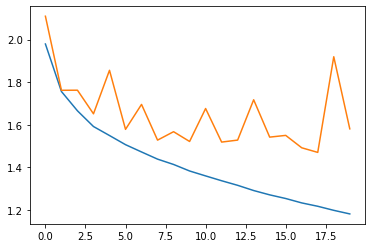

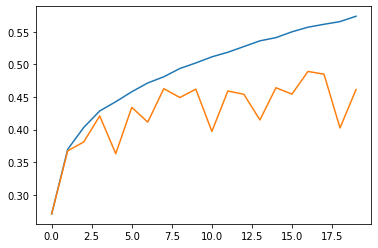

In [0]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.show()

from graphs show that there are overfitting
- it's fit when epochs = 2 but, loss is too high

In [0]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 1s 62us/sample - loss: 1.5810 - accuracy: 0.4613


[1.5809768175125123, 0.4613]

**Using Regularization (L2) - Create 2nd Model**

In [0]:
model_l2 =  kr.models.Sequential()
model_l2.add(kr.layers.Dense(128, activation = None, input_shape = (32*32*3,)))
model_l2.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01))) #decay
model_l2.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))
model_l2.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))
model_l2.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))

model_l2.add(kr.layers.Dense(n_classes, activation = 'sigmoid'))

In [0]:
model_l2.compile(loss = 'categorical_crossentropy', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['accuracy'])

**Test 2nd Model**

In [0]:
start2 = time.time()
his_l2 = model_l2.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
stamp2 = time.time()
time_used2 = stamp2-start2

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 117us/sample - loss: 4.6711 - accuracy: 0.2521 - val_loss: 3.1450 - val_accuracy: 0.2773
Epoch 2/20
50000/50000 [==============================] - 5s 109us/sample - loss: 2.5367 - accuracy: 0.3110 - val_loss: 2.3636 - val_accuracy: 0.2724
Epoch 3/20
50000/50000 [==============================] - 5s 107us/sample - loss: 2.0720 - accuracy: 0.3290 - val_loss: 2.0000 - val_accuracy: 0.3167
Epoch 4/20
50000/50000 [==============================] - 5s 108us/sample - loss: 1.9526 - accuracy: 0.3428 - val_loss: 1.9220 - val_accuracy: 0.3368
Epoch 5/20
50000/50000 [==============================] - 5s 109us/sample - loss: 1.9062 - accuracy: 0.3489 - val_loss: 1.8825 - val_accuracy: 0.3479
Epoch 6/20
50000/50000 [==============================] - 5s 110us/sample - loss: 1.8829 - accuracy: 0.3583 - val_loss: 1.9504 - val_accuracy: 0.3231
Epoch 7/20
50000/50000 [==========================

In [0]:
time_used2

110.34651207923889

Slower than normal model because it needs to calculate decay.

Regularization will make model learning slower.
Nowadays, people frequently use **Batch Normalization**.

**Display Result of 2nd Model**

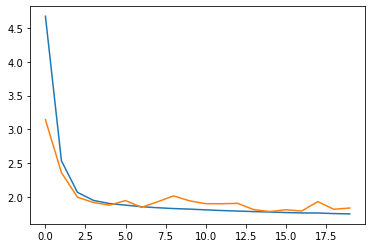

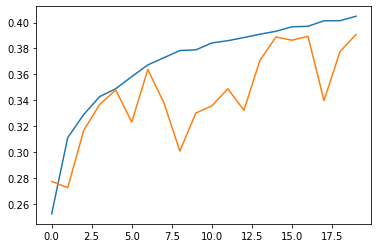

In [0]:
plt.plot(his_l2.history['loss'])
plt.plot(his_l2.history['val_loss'])
plt.show()
plt.plot(his_l2.history['accuracy'])
plt.plot(his_l2.history['val_accuracy'])
plt.show()

from loss graph, it shows characteristics of train and valid are similar.


---

** That's fix overfitting problem.

In [0]:
model_l2.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 1s 62us/sample - loss: 1.8406 - accuracy: 0.3908


[1.8405858016967773, 0.3908]

**Try to use Dropout!**

In [0]:
model_dropout =  kr.models.Sequential()
model_dropout.add(kr.layers.Dense(128, activation = None, input_shape = (32*32*3,)))
model_dropout.add(kr.layers.Dense(128, activation = 'relu'))
model_dropout.add(kr.layers.Dense(128, activation = 'relu'))
model_dropout.add(kr.layers.Dense(128, activation = 'relu'))
model_dropout.add(kr.layers.Dense(128, activation = 'relu'))
model_dropout.add(kr.layers.Dropout(0.5))
model_dropout.add(kr.layers.Dense(n_classes, activation = 'sigmoid'))

In [0]:
model_dropout.compile(loss = 'categorical_crossentropy', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['accuracy'])

**Test 3rd Model**

In [0]:
start3 = time.time()
his_dropout = model_dropout.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
stamp3 = time.time()
time_used3 = stamp3-start3

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 119us/sample - loss: 2.0500 - accuracy: 0.2375 - val_loss: 1.8751 - val_accuracy: 0.3241
Epoch 2/20
50000/50000 [==============================] - 5s 107us/sample - loss: 1.8647 - accuracy: 0.3272 - val_loss: 1.9049 - val_accuracy: 0.2857
Epoch 3/20
50000/50000 [==============================] - 5s 105us/sample - loss: 1.7699 - accuracy: 0.3648 - val_loss: 2.0705 - val_accuracy: 0.2643
Epoch 4/20
50000/50000 [==============================] - 5s 107us/sample - loss: 1.7060 - accuracy: 0.3912 - val_loss: 1.7504 - val_accuracy: 0.3592
Epoch 5/20
50000/50000 [==============================] - 5s 107us/sample - loss: 1.6538 - accuracy: 0.4134 - val_loss: 1.5791 - val_accuracy: 0.4352
Epoch 6/20
50000/50000 [==============================] - 5s 107us/sample - loss: 1.6113 - accuracy: 0.4253 - val_loss: 1.7362 - val_accuracy: 0.3808
Epoch 7/20
50000/50000 [==========================

In [0]:
time_used3

106.63284420967102

It's usually faster than normal model because Dropout cuts some nodes out.

**Display Result of 3rd Model**

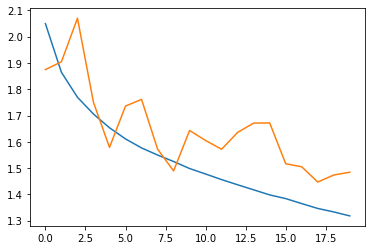

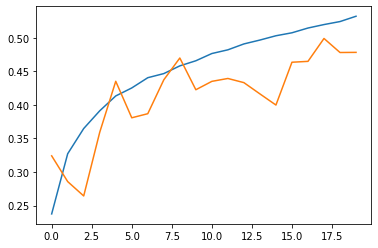

In [0]:
plt.plot(his_dropout.history['loss'])
plt.plot(his_dropout.history['val_loss'])
plt.show()
plt.plot(his_dropout.history['accuracy'])
plt.plot(his_dropout.history['val_accuracy'])
plt.show()

Dropout can reduce overfitting too.

In [0]:
model_dropout.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 1s 61us/sample - loss: 1.4848 - accuracy: 0.4783


[1.48475861492157, 0.4783]

**Let's try both of Regularization and Dropout**

In [0]:
model_both =  kr.models.Sequential()
model_both.add(kr.layers.Dense(128, activation = None, input_shape = (32*32*3,)))
model_both.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01))) #decay
model_both.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))
model_both.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))
model_both.add(kr.layers.Dense(128, activation = 'relu', kernel_regularizer=kr.regularizers.l2(0.01)))

model_both.add(kr.layers.Dropout(0.5))
model_both.add(kr.layers.Dense(n_classes, activation = 'sigmoid'))

In [0]:
model_both.compile(loss = 'categorical_crossentropy', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['accuracy'])

**Test 4th Model**

In [0]:
start4 = time.time()
his_both = model_both.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(X_valid, y_valid))
stamp4 = time.time()
time_used4 = stamp4-start4

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 107us/sample - loss: 1.7134 - accuracy: 0.4283 - val_loss: 1.8398 - val_accuracy: 0.3646
Epoch 2/20
50000/50000 [==============================] - 5s 106us/sample - loss: 1.7142 - accuracy: 0.4273 - val_loss: 1.8880 - val_accuracy: 0.3796
Epoch 3/20
50000/50000 [==============================] - 5s 105us/sample - loss: 1.7102 - accuracy: 0.4306 - val_loss: 1.7640 - val_accuracy: 0.4066
Epoch 4/20
50000/50000 [==============================] - 6s 113us/sample - loss: 1.7063 - accuracy: 0.4325 - val_loss: 1.9241 - val_accuracy: 0.3464
Epoch 5/20
50000/50000 [==============================] - 6s 110us/sample - loss: 1.7044 - accuracy: 0.4321 - val_loss: 1.7052 - val_accuracy: 0.4272
Epoch 6/20
50000/50000 [==============================] - 5s 108us/sample - loss: 1.7025 - accuracy: 0.4346 - val_loss: 1.7458 - val_accuracy: 0.4111
Epoch 7/20
50000/50000 [==========================

In [0]:
time_used4

107.40976309776306

**Display Result of 4th Model**

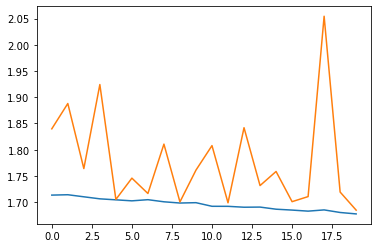

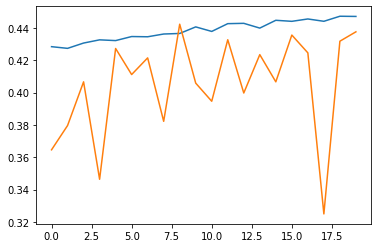

In [0]:
plt.plot(his_both.history['loss'])
plt.plot(his_both.history['val_loss'])
plt.show()
plt.plot(his_both.history['accuracy'])
plt.plot(his_both.history['val_accuracy'])
plt.show()

Normally, we have to tune hyperparameters for the best result.